In [169]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [220]:
df_sgtf=pd.read_csv('../data/sgtf.csv', index_col='Date',parse_dates=True, infer_datetime_format="D/M/Y")
df_cases=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/287fc645-4352-4477-9c8c-55bc054b7e76/download/daily_cuml_scot_20211206.csv', index_col='Date',parse_dates=True)
df_hospital=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/2dd8534b-0a6f-4744-9253-9565d62f96c2/download/trend_hb_20211206.csv', index_col='Date',parse_dates=True)

df_hospital=df_hospital[df_hospital['HBName']=='Scotland']

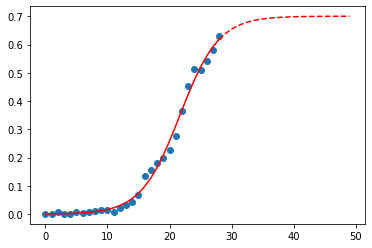

In [223]:

y_data=df_sgtf['SGTF %'].values
x_data=np.arange(0,len(y_data),1)

def func(x, L ,x0, k, b):
    return L / (1 + np.exp(-k*(x-x0)))+b

p0 = [max(y_data), np.median(x_data),1,min(y_data)] # this is an mandatory initial guess

popt, pcov = curve_fit(func, x_data, y_data,p0)
forecast_range=np.arange(x_data[-1],50,1)

plt.plot(forecast_range, func(forecast_range, *popt), 'r-', ls='--')

plt.plot(x_data, func(x_data, *popt), 'r-')

plt.scatter(x=x_data,y=y_data)


In [224]:
df_sgtf_analysis=pd.merge(df_hospital, df_sgtf, left_index=True, right_index=True)
df_sgtf_analysis['Hosp+7D']=df_sgtf_analysis['HospitalAdmissions'].shift(-7)
df_sgtf_analysis['Hosp_rate']=100*(df_sgtf_analysis['Hosp+7D']/df_sgtf_analysis['DailyPositive'])
df_sgtf_analysis['SGTF %']=100*df_sgtf_analysis['SGTF %']
df_sgtf_analysis.tail(8)

,HB,HBName,DailyPositive,CumulativePositive,CrudeRatePositive,CrudeRate7DayPositive,DailyDeaths,CumulativeDeaths,CrudeRateDeaths,DailyNegative,...,TotalPillar2,HospitalAdmissions,HospitalAdmissionsQF,ICUAdmissions,ICUAdmissionsQF,PositivePillar1,PositivePillar2,SGTF %,Hosp+7D,Hosp_rate
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-14,S92000003,Scotland,6255,785115,14363.611416,552.872302,7,9785,179.015734,10663,...,43667,51.0,NaN,3.0,NaN,325,6519,27.5,NaN,NaN
2021-12-15,S92000003,Scotland,6841,791956,14488.766923,602.579583,4,9789,179.088913,10608,...,44469,64.0,NaN,3.0,NaN,309,7237,36.5,NaN,NaN
2021-12-16,S92000003,Scotland,6255,798211,14603.201610,644.474936,2,9791,179.125503,9499,...,42624,65.0,NaN,6.0,NaN,291,6675,45.5,NaN,NaN
2021-12-17,S92000003,Scotland,5563,803774,14704.976217,678.192462,6,9797,179.235273,8216,...,35926,57.0,NaN,3.0,NaN,270,5882,51.4,NaN,NaN
2021-12-18,S92000003,Scotland,4823,808597,14793.212587,707.317966,5,9802,179.326747,6183,...,27112,44.0,NaN,2.0,NaN,229,5203,51.1,NaN,NaN
2021-12-19,S92000003,Scotland,5167,813764,14887.742408,740.998902,4,9806,179.399927,5641,...,26795,40.0,NaN,0.0,NaN,203,5603,54.2,NaN,NaN
2021-12-20,S92000003,Scotland,7158,820922,15018.697402,769.520673,4,9810,179.473106,8611,...,38308,NaN,:,9.0,NaN,426,7635,57.9,NaN,NaN
2021-12-21,S92000003,Scotland,3050,823972,15074.496890,710.885474,1,9811,179.491401,3424,...,12798,NaN,:,7.0,NaN,451,3011,62.9,NaN,NaN


In [217]:
df_sgtf_analysis=df_sgtf_analysis[['SGTF %', 'Hosp_rate']]
# df_sgtf_analysis=df_sgtf_analysis[df_sgtf_analysis['SGTF %']>1]
df_sgtf_analysis=df_sgtf_analysis.dropna()
df_sgtf_analysis.tail()

,SGTF %,Hosp_rate
Date,,
2021-12-08,6.9,1.551891
2021-12-09,13.5,1.639344
2021-12-10,15.5,1.532258
2021-12-11,18.0,1.361807
2021-12-12,20.0,1.202646


Text(0.5, 1.0, 'Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

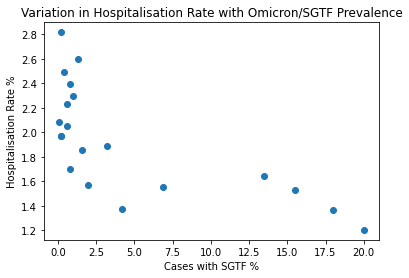

In [218]:
plt.scatter(x=df_sgtf_analysis['SGTF %'],y=df_sgtf_analysis['Hosp_rate'])
plt.xlabel('Cases with SGTF %')
plt.ylabel('Hospitalisation Rate %')
plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

No handles with labels found to put in legend.


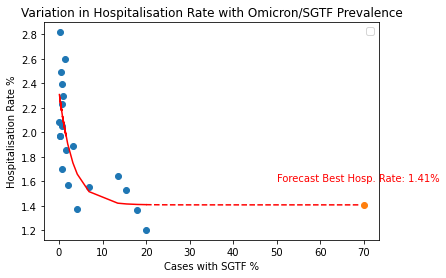

In [219]:
from scipy.optimize import curve_fit

# def func(x, a, b):
#     return a * x + b

def func(x, a, b, c):
    return a*np.exp(-b*x) + c


popt, pcov = curve_fit(func, df_sgtf_analysis['SGTF %'], df_sgtf_analysis['Hosp_rate'])

plt.plot(df_sgtf_analysis['SGTF %'], func(df_sgtf_analysis['SGTF %'], *popt), 'r-')
plt.scatter(x=df_sgtf_analysis['SGTF %'],y=df_sgtf_analysis['Hosp_rate'])

forecast_range=np.arange(df_sgtf_analysis['SGTF %'].values[-1],70,1)
plt.plot(forecast_range, func(forecast_range, *popt), 'r-', ls='--')

plt.legend()
plt.xlabel('Cases with SGTF %')
plt.ylabel('Hospitalisation Rate %')
plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

best_hosp_rate=func(forecast_range, *popt)[-1]
plt.text(x=50,y=1.6,s='Forecast Best Hosp. Rate: '+str(np.round(func(forecast_range, *popt)[-1],2))+'%',c='r')
plt.scatter(x=70,y=func(forecast_range, *popt)[-1])

In [193]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")

df_gov_sgtf=pd.read_csv('https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1043759/sgtf_regionepicurve_2021-12-22.csv',index_col='specimen_date',parse_dates=True,date_parser=custom_date_parser)
df_gov_sgtf_lon=df_gov_sgtf[(df_gov_sgtf['UKHSA_region']=='London') & (df_gov_sgtf['sgtf']=='Cases with confirmed SGTF')]
london_cases=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=region;areaName=London&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',index_col='date',parse_dates=True,infer_datetime_format="D/M/Y")
london_hospital_admissions=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=nhsRegion;areaName=London&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',index_col='date',parse_dates=True,infer_datetime_format="D/M/Y")

In [194]:
london_sgtf_analysis=pd.merge(london_hospital_admissions['newAdmissions'],london_cases['newCasesBySpecimenDate'],left_index=True,right_index=True)
london_sgtf_analysis=pd.merge(london_sgtf_analysis,df_gov_sgtf_lon['percent'].tail(20),left_index=True,right_on='specimen_date')

(0.0, 100.0)

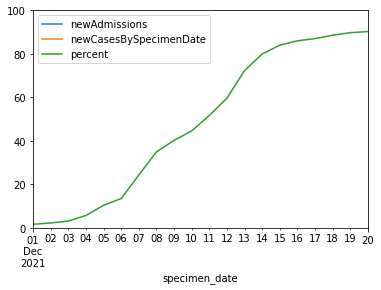

In [195]:
london_sgtf_analysis.plot()
plt.ylim(0,100)

In [196]:
y_data=df_gov_sgtf_lon['percent'].tail(25).values
x_data=np.arange(0,len(y_data),1)

def func(x, L ,x0, k, b):
    return L / (1 + np.exp(-k*(x-x0)))+b

p0 = [max(y_data), np.median(x_data),1,min(y_data)] # this is an mandatory initial guess

popt, pcov = curve_fit(func, x_data, y_data,p0)

(0.0, 100.0)

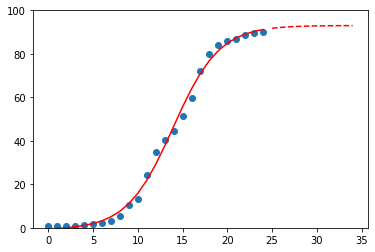

In [197]:
plt.plot(x_data, func(x_data, *popt), 'r-')

forecast_range=np.arange(25,35,1)
plt.plot(forecast_range, func(forecast_range, *popt), 'r-', ls='--')

plt.scatter(x=x_data,y=y_data)
# df_gov_sgtf_lon['percent'].tail(25).plot()
# # plt.legend()
# # plt.xlabel('Cases with SGTF %')
# # plt.ylabel('Hospitalisation Rate %')
# # plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')
plt.ylim(0,100)

In [198]:
london_sgtf_analysis=pd.merge(london_hospital_admissions, london_cases, left_index=True, right_index=True)
london_sgtf_analysis=pd.merge(london_sgtf_analysis,df_gov_sgtf_lon,left_index=True,right_index=True)


In [199]:
london_sgtf_analysis['Hosp+7D']=london_sgtf_analysis['newAdmissions'].shift(7)
london_sgtf_analysis=london_sgtf_analysis.dropna()
london_sgtf_analysis['Hosp_rate']=100*(london_sgtf_analysis['Hosp+7D']/london_sgtf_analysis['newCasesBySpecimenDate'])
london_sgtf_analysis['SGTF %']=london_sgtf_analysis['percent']
london_sgtf_analysis=london_sgtf_analysis[london_sgtf_analysis['SGTF %']>1]

Text(0.5, 1.0, 'Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

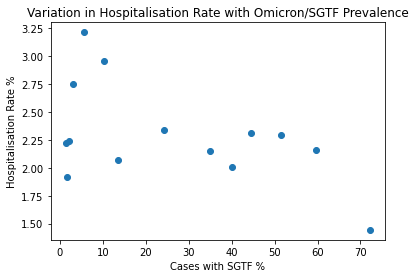

In [200]:
plt.scatter(x=london_sgtf_analysis['SGTF %'],y=london_sgtf_analysis['Hosp_rate'])
plt.xlabel('Cases with SGTF %')
plt.ylabel('Hospitalisation Rate %')
plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')
# plt.yscale('log')
# plt.ylim(0,10)

In [158]:
london_sgtf_analysis.head()

,areaType_x,areaName_x,areaCode_x,newAdmissions,cumAdmissions,areaType_y,areaName_y,areaCode_y,newCasesBySpecimenDate,cumCasesBySpecimenDate,UKHSA_region,n,percent,sgtf,total,conf_low,conf_high,Hosp+7D,Hosp_rate,SGTF %
2021-12-12,nhsRegion,London,E40000003,157,90792,region,London,E12000007,11357,1404562,London,2131,59.54,Cases with confirmed SGTF,3579,57.910343,61.152561,245.0,2.157260,59.54
2021-12-11,nhsRegion,London,E40000003,166,90635,region,London,E12000007,9146,1393205,London,1004,51.62,Cases with confirmed SGTF,1945,49.371933,53.860683,210.0,2.296086,51.62
2021-12-10,nhsRegion,London,E40000003,162,90469,region,London,E12000007,9531,1384059,London,2056,44.47,Cases with confirmed SGTF,4623,43.035216,45.920602,220.0,2.308257,44.47
2021-12-09,nhsRegion,London,E40000003,142,90307,region,London,E12000007,9639,1374528,London,1535,40.15,Cases with confirmed SGTF,3823,38.595463,41.727902,193.0,2.002282,40.15
2021-12-08,nhsRegion,London,E40000003,132,90165,region,London,E12000007,9364,1364889,London,1075,34.88,Cases with confirmed SGTF,3082,33.201106,36.596798,201.0,2.146519,34.88


No handles with labels found to put in legend.


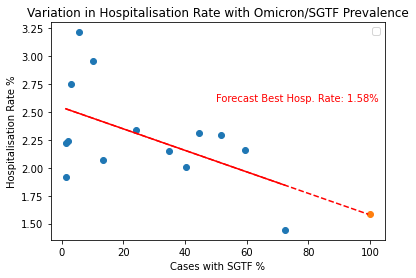

In [202]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x + b

# def func(x, a, b, c):
#     return a*np.exp(-b*x) + c

popt, pcov = curve_fit(func, london_sgtf_analysis['SGTF %'], london_sgtf_analysis['Hosp_rate'])

plt.plot(london_sgtf_analysis['SGTF %'], func(london_sgtf_analysis['SGTF %'], *popt), 'r-')
plt.scatter(x=london_sgtf_analysis['SGTF %'],y=london_sgtf_analysis['Hosp_rate'])

forecast_range=np.arange(london_sgtf_analysis['SGTF %'].values[-1],100,1)
plt.plot(forecast_range, func(forecast_range, *popt), 'r-', ls='--')

plt.legend()
plt.xlabel('Cases with SGTF %')
plt.ylabel('Hospitalisation Rate %')
plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

best_hosp_rate=func(forecast_range, *popt)[-1]
plt.text(x=50,y=2.6,s='Forecast Best Hosp. Rate: '+str(np.round(func(forecast_range, *popt)[-1],2))+'%',c='r')
plt.scatter(x=100,y=func(forecast_range, *popt)[-1])